<h1>1° Laboratorio de EYP3701</h1>

<h2><span style="color:chocolate;">Introduction to Newton's Algorithm and Gradient Descent</span></h2>

<p><strong>Ayudante</strong> Diego Bernal</p>



<ul>
    <li>Comment your code.</li>
    <li>Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.</li>
    <li>Try to minimize the use of the global namespace (meaning, keep things inside functions).</li>
</ul>


<p>Based in the material from Standford course math 114 intro to optimization and Berkeley Department of data science.</p>

In [1]:
# Install the libraries if you didn't have
#%%capture
#%pip install numpy matplotlib pandas

In [2]:
#Import the libraries 
import numpy as np #manage og matrix
import matplotlib.pyplot as plt #plot graphs
import pandas as pd # Data wrangling 
import seaborn as sns

c:\Users\Diego\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<h2>Data as Matrices</h2>
<p>Data usually comes in the form of matrices. The python Numpy library makes it easy to manipulate matrices efficiently.</p>

In [3]:
#Inputs Matrices

A = np.array([4,5,6])
B = np.arange(2,18).reshape(4,4)
C = np.full((2,3),2)
D = np.identity(4)

In [4]:
print(A,B,C,D)

[4 5 6] [[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]
 [14 15 16 17]] [[2 2 2]
 [2 2 2]] [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


<h2>Excercise 1: Matrix Manipulation </h2>

<ol>
<li>3A + 1</li>
<li>Sums of rows of B:</li>
<li>Sums of columns of B</li>
<li>Number of elements B greater than 6</li>
<li>C + C</li>
<li>B * D</li>
<li>(B * B) - D</li>
</ol>

In [5]:
res_1 = 3 * A +1
res_2 = np.sum(B,axis=1)
res_3 = np.sum(B, axis=0)
res_4 = np.sum(B>6)
res_5 = C + C
res_6 = np.dot(D, B)
res_7 = (B * B) - D

In [6]:
results = [res_1,res_2,res_3,res_4,res_5,res_6,res_7]
for i,res in enumerate(results, start=1):
    i += 1 
    print(f"The result for the sub-excercise {i} is: {res} ")

The result for the sub-excercise 2 is: [13 16 19] 
The result for the sub-excercise 3 is: [14 30 46 62] 
The result for the sub-excercise 4 is: [32 36 40 44] 
The result for the sub-excercise 5 is: 11 
The result for the sub-excercise 6 is: [[4 4 4]
 [4 4 4]] 
The result for the sub-excercise 7 is: [[ 2.  3.  4.  5.]
 [ 6.  7.  8.  9.]
 [10. 11. 12. 13.]
 [14. 15. 16. 17.]] 
The result for the sub-excercise 8 is: [[  3.   9.  16.  25.]
 [ 36.  48.  64.  81.]
 [100. 121. 143. 169.]
 [196. 225. 256. 288.]] 


<h2>Excercise 2: Data generation & Bias and Variance</h2>

--- Seek for a example

First we have to create a function that will generate artificial data creating a vector of inputs **X** and a corresponding vector of targets outputs **Y**. 

<ol>
<li>Create a function that recive some parameters (slope, intercept,etc) and the output would be a vector of inputs X and a vector of target Y in 1 dimension</li>
<li>Modify te last function to create more vector X with a random correlation with the output variable. Plot the correlation matrix and make a n hypothesis testing for each</li>
<li>For each function genrate some random data and compute the predictions for each model. These predictions should be vectors of the same shape as Y. Then plot the predictions lines of these two models overlayed on the observed data.</li>
<li>Create a function that measure the Mean square error, for each *x*, we'll compare *y* the true label, with the predicted value of y.</li>
<li>Create an iterator to visualize the trade off between Bias and Variance for each model using the past functions. Use F(x)= x^2 as the true relation. Modify your functions</li>
</ol>

In [7]:
#Space generated to import the functions from get_data.py
#In general in the company's it's common to separate in a modular way the functions and then to main import all the features that you want to develop
from get_data import generate_data_1_d,generate_data_n_dim,plot_corr_matrix,compute_mse,compute_predictons,generate_data_1_d_uni

In [8]:
#Example of a 1 dim problem with one vector

def create_1d_data(num_examples=10, w=2, b=1, random_scale=1):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    random_scale: add uniform noise between -random_scale and +random_scale

  Returns:
    X and Y with shape (num_examples)
  """
  X = np.arange(num_examples)
  np.random.seed(4)  # consistent random number generation
  deltas = np.random.uniform(low=-random_scale, high=random_scale, size=X.shape)
  Y = b + deltas + w * X
  return X, Y

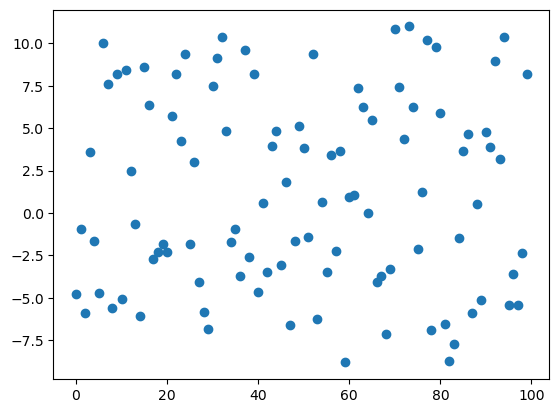

In [9]:
X, Y, w = generate_data_1_d(num_gen=100,w=0,b=1)
plt.scatter(X, Y)
plt.show()

In [10]:
pred_list = []
mse_list = []

def true_fun(X):
    return X**3 #Quadratic relation

def generate_true_values(size):
    np.random.seed(707)
    X = np.random.uniform(0, 20, size=(size,))
    Y = true_fun(X)
    return X, Y

X_true,Y_true = generate_true_values(200)


c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

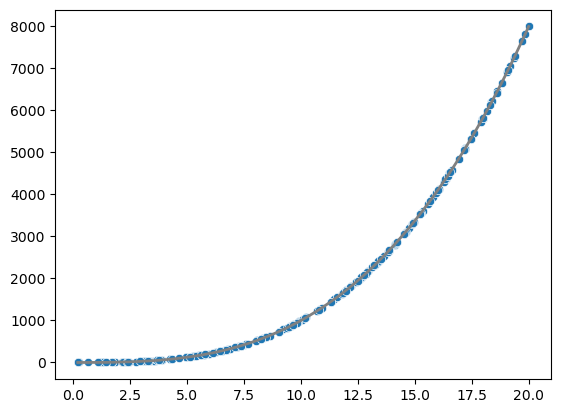

In [11]:
sns.scatterplot(x=X_true,y = Y_true)
sns.lineplot(x = X_true,y= Y_true,color='grey',linewidth=2)

In [12]:
X.ndim

1

In [13]:
X_true.shape[0]

200

In [14]:
from sklearn.linear_model import LinearRegression

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

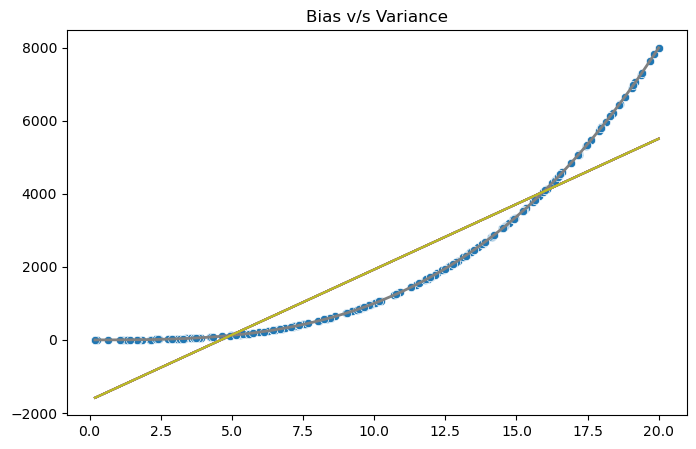

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_true,y = Y_true)
sns.lineplot(x = X_true,y= Y_true,color='grey',linewidth=2)  # Limita el rango del eje X
model = LinearRegression()

for i in range(1,10):
    np.random.seed(i)
    #Generate the data for the i_th row with i features 
    X,Y,slopes = generate_data_1_d_uni(num_gen=X_true.shape[0],w=1,b=Y_true.mean())
    #X,Y,slopes = generate_data_1_d(num_gen=X_true.shape[0],w=np.random.uniform(-1, 1),b=Y_true.mean())
    #Y_pred = compute_predictons(X,slopes) #Compute linear responses
    model.fit(X.reshape(-1, 1),Y_true)
    Y_pred = model.predict(X.reshape(-1, 1))
    sns.lineplot(x=X,y=Y_pred)


    mse = compute_mse(Y,Y_pred)
    
    #Store the results for each
    pred_list.append(Y_pred)
    mse_list.append(mse)

plt.title("Bias v/s Variance")
plt.show()

<h2>Non-parameteric approach</h2>

<p>Let's Try the same but with a different model because we saw that the true function from f(x) is not Linear!, we could implement a KNN regression </p>

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
knn = KNeighborsRegressor(n_neighbors=1)
pred_list_non_para = []
mse_list_non_para = []

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

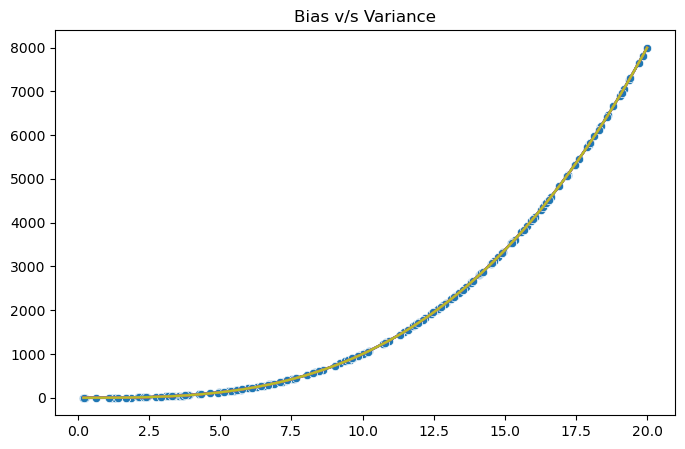

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_true,y = Y_true)
sns.lineplot(x = X_true,y= Y_true,color='grey',linewidth=2)  # Limita el rango del eje X
model = LinearRegression()

for i in range(1,10):
    np.random.seed(i)
    #Generate the data for the i_th row with i features 
    #X,Y,slopes = generate_data_1_d_uni(num_gen=X_true.shape[0],w=1,b=Y_true.mean())
    #X,Y,slopes = generate_data_1_d(num_gen=X_true.shape[0],w=np.random.uniform(-1, 1),b=Y_true.mean())
    #Y_pred = compute_predictons(X,slopes) #Compute linear responses
    X,Y = generate_true_values(200)
    knn.fit(X.reshape(-1, 1),Y)
    Y_pred = knn.predict(X.reshape(-1, 1))
    sns.lineplot(x=X,y=Y_pred)
    mse = compute_mse(Y,Y_pred)
    #Store the results for each
    pred_list_non_para.append(Y_pred)
    mse_list_non_para.append(mse)

plt.title("Bias v/s Variance")
plt.show()

<h2>Newton-Rhapson Algorithm</h2>

Find the local minimum or maximum of a differntiavle function $f: R^n -> R$ by solving $\nabla f(x) = 0$

![image info](./img_1.png)

In [19]:
from newton_Raphson import newton_method, plot_newton_method

In [20]:
X, Y, true_w = generate_data_n_dim(size=200, num_features=3, noise=5)

weights, losses = newton_method(X, Y, num_epochs=10,epsilon=0.01)

for epoch, (W, loss) in enumerate(zip(weights, losses)):
    print(f"Epoch {epoch+1}: Loss = {loss:.4f}, Weights = {W}")


Convergio en la iteración 1
Epoch 1: Loss = 27.7072, Weights = [1. 1. 1.]
Epoch 2: Loss = 27.7072, Weights = [ 0.09815759 -0.34475424  0.18870982]


In [21]:
X, Y, true_w = generate_data_1_d(num_gen=10, w=2, b=5)

X_with_bias = np.c_[np.ones(X.shape[0]), X]  

weights, losses = newton_method(X_with_bias, Y, num_epochs=10, epsilon=1)



Convergio en la iteración 1


In [22]:
losses

array([26.5669475, 26.5669475])

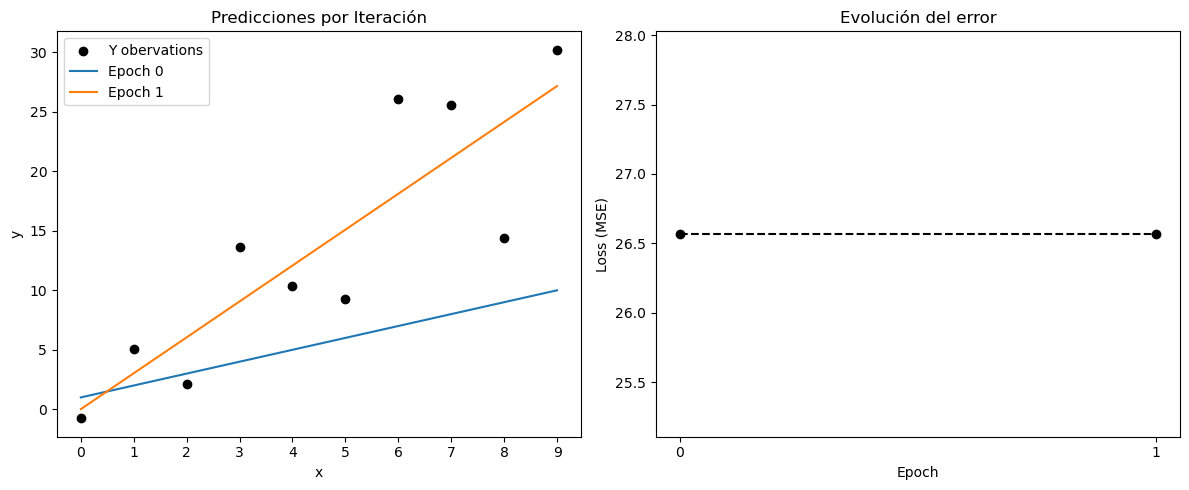

In [23]:
plot_newton_method(X_with_bias, Y, weights, losses)

<h2>Steepest Gradient Descent Algorithm</h2>

<p>Minimize f(x) by iteratively moving in the direction of the steepest descent</p>

![image info](./img_2.png)

In [24]:
from gd import gd_method,gd_method_exact_learning,plot_gd

In [30]:
X, Y, true_w = generate_data_n_dim(size=200, num_features=1, noise=5)

weights, losses = gd_method(X, Y, num_epochs=10,learning_rate=0.02,epsilon=0.01)

for epoch, (W, loss) in enumerate(zip(weights, losses)):
    print(f"Epoch {epoch+1}: Loss = {loss:.4f}, Weights = {W}")


Convergioen la iteracion 6
Epoch 1: Loss = 27.4657, Weights = [1.]
Epoch 2: Loss = 27.1449, Weights = [0.450989]
Epoch 3: Loss = 27.1270, Weights = [0.58060016]
Epoch 4: Loss = 27.1260, Weights = [0.55000141]
Epoch 5: Loss = 27.1260, Weights = [0.5572252]
Epoch 6: Loss = 27.1260, Weights = [0.5555198]
Epoch 7: Loss = 27.1260, Weights = [0.55592241]


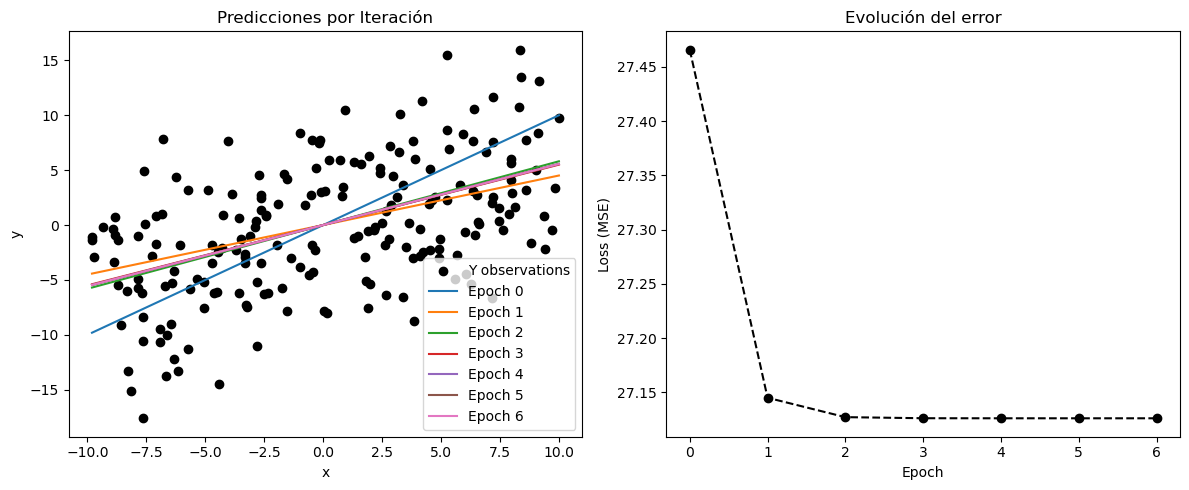

In [31]:
plot_gd(X, Y, weights, losses)

In [32]:
X_with_bias = np.c_[np.ones(X.shape[0]), X]  

In [33]:
weights, losses = gd_method(X_with_bias, Y, num_epochs=10,learning_rate=0.02,epsilon=0.01)

for epoch, (W, loss) in enumerate(zip(weights, losses)):
    print(f"Epoch {epoch+1}: Loss = {loss:.4f}, Weights = {W}")


Epoch 1: Loss = 28.9140, Weights = [1. 1.]
Epoch 2: Loss = 28.4691, Weights = [0.94688343 0.44744641]
Epoch 3: Loss = 28.3407, Weights = [0.89784899 0.57808208]
Epoch 4: Loss = 28.2380, Weights = [0.85031313 0.54741517]
Epoch 5: Loss = 28.1443, Weights = [0.80478736 0.55482345]
Epoch 6: Loss = 28.0579, Weights = [0.76105636 0.55323577]
Epoch 7: Loss = 27.9784, Weights = [0.71908024 0.55376552]
Epoch 8: Loss = 27.9050, Weights = [0.67878128 0.55378916]
Epoch 9: Loss = 27.8374, Weights = [0.6400942  0.55392634]
Epoch 10: Loss = 27.7751, Weights = [0.60295411 0.55403101]


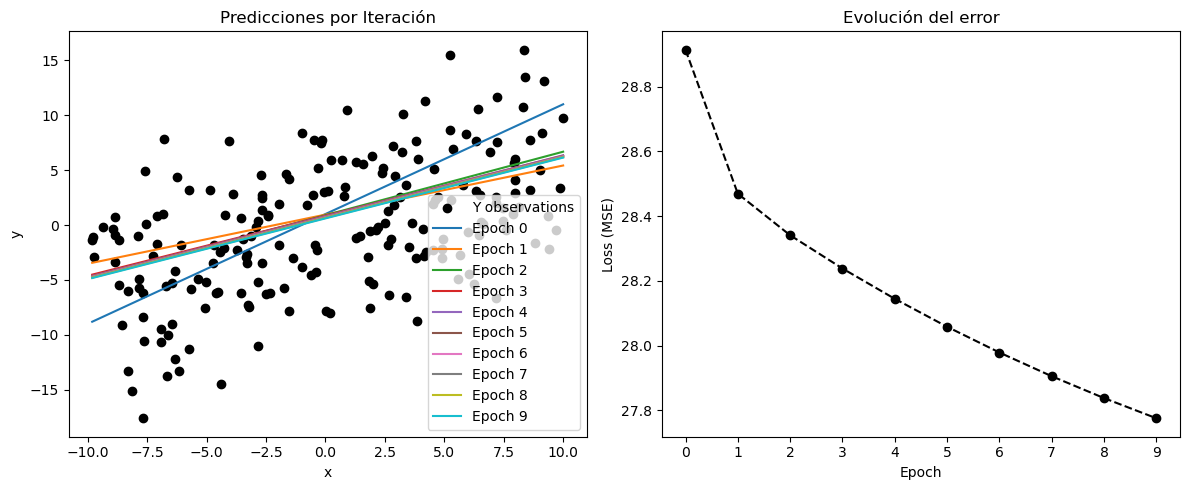

In [34]:
#Without bias
plot_gd(X_with_bias, Y, weights, losses)

<ul><li>Como podria modificar las funciones para recibir multiples dimensiones</li>
<li>Genere un iterador para probar distintos learning rate</li>
<li>Si continuamos entrenando llegaremos a 0 </li>


</ul>